___

<a href='http://www.pieriandata.com'><img src='../Pierian_Data_Logo.png'/></a>
___
<center><em>Copyright Pierian Data</em></center>
<center><em>For more information, visit us at <a href='http://www.pieriandata.com'>www.pieriandata.com</a></em></center>

# RNN Exercise

**TASK: IMPORT THE BASIC LIBRARIES YOU THINK YOU WILL USE**

In [98]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Data

Info about this data set: https://fred.stlouisfed.org/series/IPN31152N


Units:  Index 2012=100, Not Seasonally Adjusted

Frequency:  Monthly

The industrial production (IP) index measures the real output of all relevant establishments located in the United States, regardless of their ownership, but not those located in U.S. territories.

NAICS = 31152

Source Code: IP.N31152.N

Suggested Citation:
Board of Governors of the Federal Reserve System (US), Industrial Production: Nondurable Goods: Ice cream and frozen dessert [IPN31152N], retrieved from FRED, Federal Reserve Bank of St. Louis; https://fred.stlouisfed.org/series/IPN31152N, November 16, 2019.

# Project Tasks

**TASK: Read in the data set "Frozen_Dessert_Production.csv" from the Data folder. Figure out how to set the date to a datetime index columns**

In [99]:
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [100]:
path = "gdrive/My Drive/Colab Notebooks/Tensorflow 2 and Keras/RNN/Frozen_Dessert_Production.csv"

In [101]:
df = pd.read_csv(path, parse_dates=True, index_col="DATE")
df

,IPN31152N
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


**Task: Change the column name to Production**

In [102]:
df.columns = ["Production"]
df.columns

Index(['Production'], dtype='object')

In [103]:
df

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2019-05-01,114.5613
2019-06-01,124.9605
2019-07-01,110.2632


**TASK: Plot out the time series**

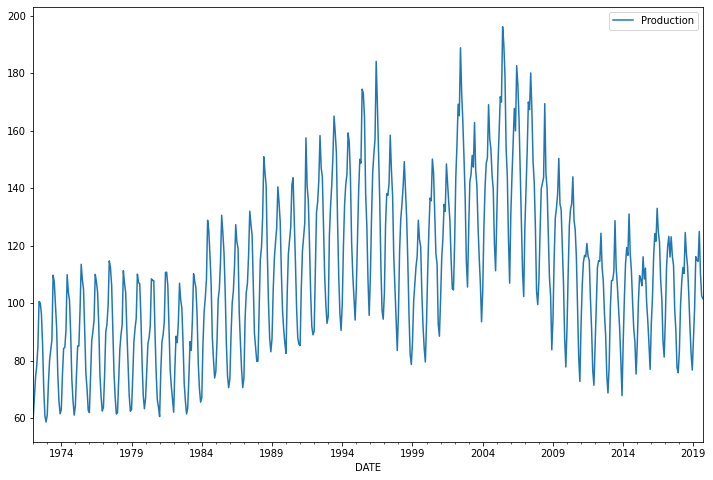

In [104]:
df.plot(figsize=(12,8))

## Train Test Split

**TASK: Figure out the length of the data set**

In [105]:
len(df)

573

**TASK: Split the data into a train/test split where the test set is the last 24 months of data.**

In [106]:
test_size = 24
test_ind = len(df) - test_size

In [107]:
train = df.iloc[:test_ind]
test = df.iloc[test_ind:]

In [108]:
train

,Production
DATE,
1972-01-01,59.9622
1972-02-01,67.0605
1972-03-01,74.2350
1972-04-01,78.1120
1972-05-01,84.7636
...,...
2017-05-01,116.0635
2017-06-01,123.0870
2017-07-01,116.2639


In [109]:
test

,Production
DATE,
2017-10-01,90.4732
2017-11-01,77.4378
2017-12-01,75.8118
2018-01-01,83.4343
2018-02-01,99.4899
2018-03-01,107.3152
2018-04-01,112.4309
2018-05-01,110.3544
2018-06-01,124.5841


In [110]:
len(test)

24

## Scale Data

**TASK: Use a MinMaxScaler to scale the train and test sets into scaled versions.**

In [111]:
from sklearn.preprocessing import MinMaxScaler

In [112]:
scaler = MinMaxScaler()

In [113]:
scaler.fit(train)

MinMaxScaler(copy=True, feature_range=(0, 1))

In [114]:
scaled_train = scaler.transform(train)
scaled_test = scaler.transform(test)

# Time Series Generator

**TASK: Create a TimeSeriesGenerator object based off the scaled_train data. The batch length is up to you, but at a minimum it should be at least 18 to capture a full year seasonality.**

In [115]:
from tensorflow.keras.preprocessing.sequence import TimeseriesGenerator

In [116]:
length = 18
generator = TimeseriesGenerator(scaled_train, scaled_train, length=length, batch_size=1)

In [117]:
X,y = generator[0]

In [118]:
X

array([[[0.00947104],
        [0.06108982],
        [0.11326273],
        [0.14145625],
        [0.18982663],
        [0.30495972],
        [0.30154406],
        [0.27416065],
        [0.19736841],
        [0.08532665],
        [0.01561588],
        [0.        ],
        [0.01774221],
        [0.09850931],
        [0.15590133],
        [0.18358944],
        [0.20878908],
        [0.37150354]]])

In [119]:
y

array([[0.3542551]])

In [120]:
len(X[0])

18

### Create the Model

**TASK: Create a Keras Sequential Model with as many LSTM units you want and a final Dense Layer.**

In [121]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

In [122]:
n_features = 1

In [123]:
model = Sequential()
model.add(LSTM(100, activation="relu", input_shape=(length,n_features)))
model.add(Dense(1))
model.compile(optimizer="adam",loss="mse")

In [124]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_2 (LSTM)                (None, 100)               40800     
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 101       
Total params: 40,901
Trainable params: 40,901
Non-trainable params: 0
_________________________________________________________________


**TASK: Create a generator for the scaled test/validation set. NOTE: Double check that your batch length makes sense for the size of the test set as mentioned in the RNN Time Series video.**

In [125]:
validation_generator = TimeseriesGenerator(scaled_test, scaled_test, length=length, batch_size=1)

**TASK: Create an EarlyStopping callback based on val_loss.**

In [126]:
from tensorflow.keras.callbacks import EarlyStopping

In [127]:
early_stop = EarlyStopping(monitor="val_loss", patience=2)

**TASK: Fit the model to the generator, let the EarlyStopping dictate the amount of epochs, so feel free to set the parameter high.**

In [128]:
model.fit_generator(generator, epochs=20, validation_data=validation_generator, callbacks=[early_stop])

Epoch 1/20
531/531 [==============================] - 4s 8ms/step - loss: 0.0235 - val_loss: 0.0022
Epoch 2/20
531/531 [==============================] - 5s 8ms/step - loss: 0.0070 - val_loss: 0.0027
Epoch 3/20
531/531 [==============================] - 4s 8ms/step - loss: 0.0042 - val_loss: 0.0021
Epoch 4/20
531/531 [==============================] - 4s 8ms/step - loss: 0.0033 - val_loss: 0.0022
Epoch 5/20
531/531 [==============================] - 4s 8ms/step - loss: 0.0035 - val_loss: 0.0024


**TASK: Plot the history of the loss that occured during training.**

In [129]:
loss= pd.DataFrame(model.history.history)

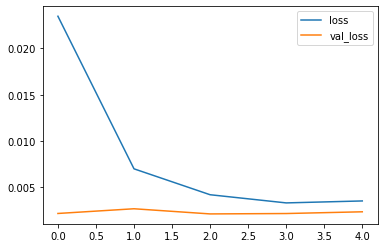

In [130]:
loss.plot()

## Evaluate on Test Data

**TASK: Forecast predictions for your test data range (the last 12 months of the entire dataset). Remember to inverse your scaling transformations. Your final result should be a DataFrame with two columns, the true test values and the predictions.**

In [133]:
test_predictions = []

first_eval_batch = scaled_train[-length:]
current_batch = first_eval_batch.reshape((1, length, n_features))

for i in range(len(test)):

  current_pred = model.predict(current_batch)[0]

  test_predictions.append(current_pred)

  current_batch = np.append(current_batch[:,1:,:], [[current_pred]],axis =1)

In [134]:
true_predictions = scaler.inverse_transform(test_predictions)

In [135]:
test["Predictions"] = true_predictions

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [137]:
test

,Production,Predictions
DATE,,
2017-10-01,90.4732,86.933792
2017-11-01,77.4378,79.164607
2017-12-01,75.8118,79.669636
2018-01-01,83.4343,89.531138
2018-02-01,99.4899,101.017278
2018-03-01,107.3152,109.872499
2018-04-01,112.4309,116.299652
2018-05-01,110.3544,119.604156
2018-06-01,124.5841,118.471216


**TASK: Plot your predictions versus the True test values. (Your plot may look different than ours).**

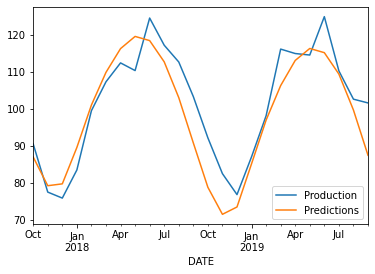

In [136]:
test.plot()

**TASK: Calculate your RMSE.**

In [138]:
from sklearn.metrics import mean_squared_error

In [139]:
mean_squared_error(test["Production"], test["Predictions"])

50.51748356031076

In [140]:
np.sqrt(mean_squared_error(test["Production"], test["Predictions"]))

7.107565234333819